# Business Intelligence
## Assignment 1
### This assignment was made by Yosuke Ueda (cph-yu173)

### 1. List all the files that this program generates.

Running the assignment_1.py generates the 4 following list of files:
1. avg_price.txt
2. price_list.csv
3. price_list.txt
4. prices.png

### 2. Describe which types of files this program generates and attach the contents of each file together with its name to your solution.

1. avg_price.txt is a text file - it shows an average of a given price
2. price_list.csv is a CSV file (comma separated file) - it is a price list in CSV format with an additional column (price_per_sqm)
3. Price_list.txt is a text file - it is a price list in text format.
4. Prices.png is a png file (Portable Network Graphics) it is an image - it is a scatterplot 

The files are attached

### 3. What is the output of this program?

The output of this program is the average of housing prices 3307228.119047619 for the listed house prices in Copenhagen

### 4. Describe in natural language -- line-by-line of code -- what the Python script is doing

The script starts by importing the relevant libraies. The program runs 5 methods (def...) and one run method which excecutes all the other methods. 

The run method do the following:
Graps the url 'https://raw.githubusercontent.com/datsoftlyngby/soft2019fall-bi-teaching-material/master/week35/data/price_list.txt', and takes the last part which is the name of the file(price_list.txt), and attach it to a path (./price_list.txt). It further joins the path from you own current working directory with the following statement: csv_path = os.path.join(os.getcwd(), csv_file_name). It generates the path so that you will be in the location where to run the scripts and the files it creates with help from the other methods.


1. Method download_txt method takes two argument url and save_path and by using requests.get(url) it downloads the content of that url and save it in a variable named response. It is written/saved in the desired path and file ./price_list.txt. It is written in wb (binary mode)  

2. Method generate_csv takes the text file as input and output a csv file. The open method specifies the price_list.txt and reads all the lines with readlines method and store that content in txt_content variable. The price_list.txt originally only had the rows street, city, price and sqm, but a new column with header is added (price_per_sqm) with rows = [['street', 'city', 'price', 'sqm', 'price_per_sqm']] and by looping over the content it does the following to clean the data. It uses rstrip().replace('  * ', '') to remove the * and line.split('\t') to eliminate the tab and simultaneously breaking the line into following variables address, price, sqm. Another line.split('; ') is splitting the string with ; and creating the other variables namely street, city. The price_per_sqm is calculated with Floor division. Price is converted to int and divided by sqm. The list/array rows which is already defined with header appends the new attributes inside the loop. The method makes an inqury regarding if one uses windows platform. The result of the looped content is now written ('w') to a csv file.

3. Method read_prices reads the csv file (price_list.csv), and returns a pricelist with index. The reader(next) go through the csv file and with the loop it sets the price column to the position and fills two list. Index and price.

4. Method compute_avg_price unzippes (zip(*)) the datafile generated from the method read_prices and uses statistics library to calculate the average of the pricelist which it will write to a file avg_price.txt. The method returns the average price.

5. Method generate_plot unzippes the datafile and plot it to a scatterdiagram which can be used by importing matplotlib and save this file to prices.png

### 5. Write (code) a function in the assignment_1.py file, which plots a histogram of the price data, with -- say -- 7 bins in the histogram.

def generate_histogram(data):
    x_values, y_values = zip(*data)    
    plt.title("Houseprice Histogram")
    plt.style.use('ggplot')
    plt.ylabel('Price')    
    plt.hist(y_values, bins=7)

### 6. Write (text) a sentence into the assignment_1.py about the result of the histogram

3307228.119047619


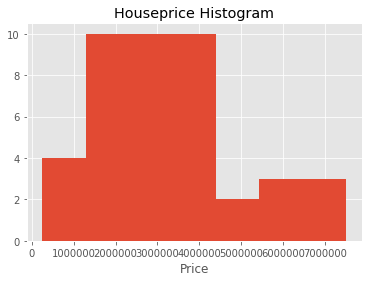

In [93]:
import os
import csv
import requests
import platform
import statistics
#import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline


def download_txt(url, save_path='./downloaded'):
    response = requests.get(url)
    with open(save_path, 'wb') as f:
        f.write(response.content)
               

def generate_csv(txt_input_path, csv_output_path):
    with open(txt_input_path, encoding='utf-8') as f:
        txt_content = f.readlines()

    rows = [['street', 'city', 'price', 'sqm', 'price_per_sqm']]
    for line in txt_content:
        line = line.rstrip().replace('  * ', '')
        address, price, sqm = line.split('\t')
        street, city = address.split('; ')
        price_per_sqm = int(price) // int(sqm)
        row = (street, city, price, sqm, price_per_sqm)
        rows.append(row)

    if platform.system() == 'Windows':
        newline=''
    else:
        newline=None

    with open(csv_output_path, 'w', newline=newline, encoding='utf-8') as f:
        output_writer = csv.writer(f)
        for row in rows:
            output_writer.writerow(row)


def read_prices(csv_input_path):
    with open(csv_input_path, encoding='utf-8') as f:
        reader = csv.reader(f)
        _ = next(reader)
        idxs = []
        prices = []
        for row in reader:
            _, _, price, _, _ = row            
            idxs.append(reader.line_num)
            prices.append(int(price))            

    return list(zip(idxs, prices))


def compute_avg_price(data):
    _, prices = zip(*data)
    avg_price = statistics.mean(prices)
   
    with open('avg_price.txt', 'w', encoding='utf-8') as f:
        f.write(str(avg_price))

    return avg_price


def generate_plot(data):

    x_values, y_values = zip(*data)
    fig = plt.figure()
    plt.scatter(x_values, y_values, s=100)
    fig.savefig('./prices.png', bbox_inches='tight')

def generate_histogram(data):
    x_values, y_values = zip(*data)
    
    plt.title("Houseprice Histogram")
    plt.style.use('ggplot')
    plt.xlabel('Price')    
    plt.hist(y_values, bins=7)    
        
    

def run():
    file_url = 'https://raw.githubusercontent.com/datsoftlyngby/' \
               'soft2019fall-bi-teaching-material/master/' \
               'week35/data/price_list.txt'
    txt_file_name = os.path.basename(file_url)
    txt_path = os.path.join('./', txt_file_name)
    download_txt(file_url, txt_path)
    csv_file_name = 'price_list.csv'
    csv_path = os.path.join(os.getcwd(), csv_file_name)
    generate_csv(txt_path, csv_path)
    data = read_prices(csv_path)
    avg_price = compute_avg_price(data)
    print(avg_price)
    #generate_plot(data)
    generate_histogram(data)

#    ...
# The histogram shows that the mean of houseprices are concentrated between 2 mill to 4 mill. 
# It fits with the average calculated by this scripts 3307228. However, in matter of visualization it would be better,
# to increase the bins to 10 or 15, as it gives a better overview of the figure. 


if __name__ == '__main__':
    run()